In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Count of days

In [79]:
df = pd.read_csv('data/clear_data.xls')
df

,merchant_name,day,cashback
0,1С Интерес,2022-01-21 00:00:00,240.53
1,1С Интерес,2022-01-22 00:00:00,399.21
2,1С Интерес,2022-01-23 00:00:00,385.44
3,1С Интерес,2022-01-24 00:00:00,209.48
4,1С Интерес,2022-01-25 00:00:00,361.80
...,...,...,...
27537,Яндекс.Еда и Лавка,2023-01-27 00:00:00,13950.84
27538,Яндекс.Еда и Лавка,2023-01-28 00:00:00,17400.74
27539,Яндекс.Еда и Лавка,2023-01-29 00:00:00,13286.25
27540,Яндекс.Еда и Лавка,2023-01-30 00:00:00,8075.79


In [80]:
df = df['merchant_name'].value_counts() // 10 * 10 + 10
df = df.value_counts()
df

count
40     80
10     75
20     58
30     54
60     50
70     49
50     34
100    27
80     13
90     12
110    10
130     8
170     7
210     6
120     5
140     4
180     4
160     3
150     2
190     2
200     2
220     2
230     2
250     2
340     2
310     1
260     1
290     1
Name: count, dtype: int64

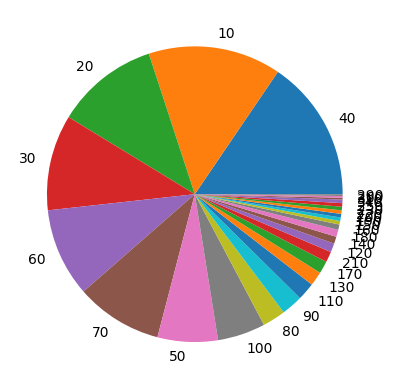

In [81]:
plt.pie(df, labels=df.index)
plt.show()

# All aggregated

In [82]:
df = pd.read_csv('data/clear_data.xls')
df['day'] = pd.to_datetime(df['day'])
df

,merchant_name,day,cashback
0,1С Интерес,2022-01-21,240.53
1,1С Интерес,2022-01-22,399.21
2,1С Интерес,2022-01-23,385.44
3,1С Интерес,2022-01-24,209.48
4,1С Интерес,2022-01-25,361.80
...,...,...,...
27537,Яндекс.Еда и Лавка,2023-01-27,13950.84
27538,Яндекс.Еда и Лавка,2023-01-28,17400.74
27539,Яндекс.Еда и Лавка,2023-01-29,13286.25
27540,Яндекс.Еда и Лавка,2023-01-30,8075.79


In [83]:
df['day'] = df['day'].dt.dayofyear
df

,merchant_name,day,cashback
0,1С Интерес,21,240.53
1,1С Интерес,22,399.21
2,1С Интерес,23,385.44
3,1С Интерес,24,209.48
4,1С Интерес,25,361.80
...,...,...,...
27537,Яндекс.Еда и Лавка,27,13950.84
27538,Яндекс.Еда и Лавка,28,17400.74
27539,Яндекс.Еда и Лавка,29,13286.25
27540,Яндекс.Еда и Лавка,30,8075.79


In [84]:
df = df.groupby('day')['cashback'].mean()
df

day
1       6791.914179
2       7641.970203
3       8755.462697
4       7096.624286
5       7184.573418
           ...     
361    16157.286557
362    16722.948806
363    18967.725294
364    26108.819538
365    22821.962034
Name: cashback, Length: 365, dtype: float64

In [85]:
df = df / df.sum()
df

day
1      0.002948
2      0.003317
3      0.003800
4      0.003080
5      0.003118
         ...   
361    0.007012
362    0.007258
363    0.008232
364    0.011331
365    0.009905
Name: cashback, Length: 365, dtype: float64

In [86]:
df.to_csv('data/all_aggregated.csv')

# Trand

In [87]:
df = pd.read_csv('super_hard_puper_test.csv')
df['time'] = pd.to_datetime(df['time'])
df

,Unnamed: 0,merchant,time,cashback,year,month,day
0,0,1с интерес,2022-01-21,240.53,2022,1,21
1,1,1с интерес,2022-01-22,399.21,2022,1,22
2,2,1с интерес,2022-01-23,385.44,2022,1,23
3,3,1с интерес,2022-01-24,209.48,2022,1,24
4,4,1с интерес,2022-01-25,361.80,2022,1,25
...,...,...,...,...,...,...,...
65,5161,1с интерес,2022-03-27,103.98,2022,3,27
66,5162,1с интерес,2022-03-28,131.86,2022,3,28
67,5163,1с интерес,2022-03-29,91.91,2022,3,29
68,5164,1с интерес,2022-03-30,141.44,2022,3,30


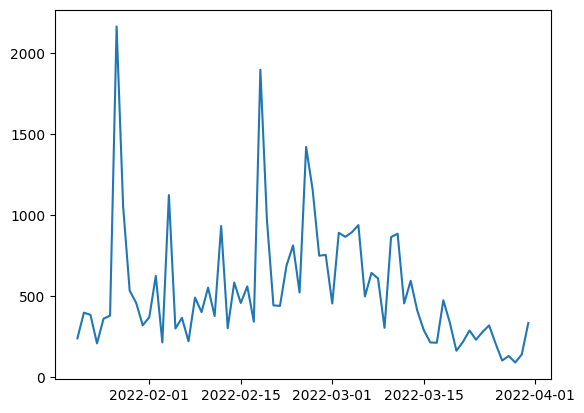

In [88]:
plt.plot(df['time'], df['cashback'])
plt.show()

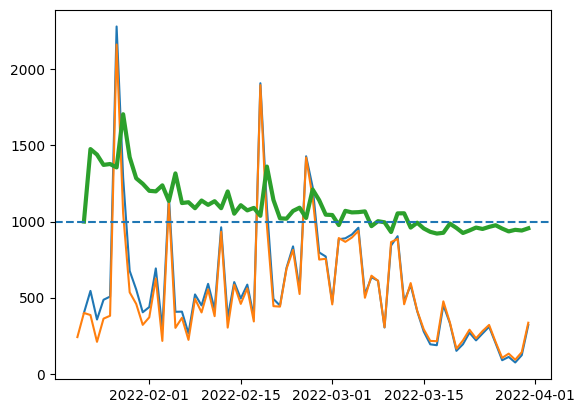

In [89]:
def get_trand(history: dict[datetime.date, int], start_date, finish_date, alpha=0.07, mul=1):
    df = pd.Series(index=pd.date_range(start_date, finish_date))
    df[history.keys()] = list(history.values())
    df.interpolate(inplace=True)
    df = df.diff()
    df.dropna(inplace=True)
    df = df.ewm(alpha=alpha, adjust=False).mean()
    if df.shape[0]:
        trand = df.iloc[-1]
    else:
        trand = 0
    return float(trand)

df['trand'] = pd.Series()
for i in df.index:
    if i < 1:
        continue
    history = df[df['time'] < df.iloc[i]['time']]
    df.iloc[i, df.columns.get_loc('trand')] = get_trand(dict(zip(history['time'], history['cashback'])), history['time'].min(), history['time'].max())
df
plt.plot(df['time'], df['trand'] + df['cashback'])
plt.plot(df['time'], df['cashback'])
plt.plot(df['time'], df['trand'] * 3 + 1000, linewidth=3)
plt.axhline(y=1000, linestyle='--')
plt.show()